In [1]:
pip install pymysql


  Using cached PyMySQL-1.0.3-py3-none-any.whl (43 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pymysql
import requests
import pandas as pd
import sqlite3
from datetime import datetime


In [5]:
def extract_data():
    url = "https://disease.sh/v3/covid-19/all"
    response = requests.get(url)
    data = response.json()
    return data


In [7]:
import pandas as pd
import requests

# Fazer uma requisição GET para a API
response = requests.get("https://api.covid19api.com/summary")

# Transformar a resposta em um objeto JSON
data = response.json()

# Criar um dataframe Pandas com os dados de países
countries_df = pd.DataFrame(data["Countries"])


In [8]:
# Conectar ao banco de dados
conn = sqlite3.connect("covid19.db")

In [9]:
import sqlite3
import pandas as pd

# Criar uma conexão com o banco de dados em memória
conn = sqlite3.connect(":memory:")

# Criar um dataframe Pandas com os dados de países
data = {"Countries": [{"Country": "Brazil", "Population": 213_029_286}, 
                       {"Country": "India", "Population": 1_366_417_754}, 
                       {"Country": "USA", "Population": 332_915_073}]}
countries_df = pd.DataFrame(data["Countries"])

# Inserir os dados no banco de dados
countries_df.to_sql("countries", conn, if_exists="replace")

# Consultar os dados do banco de dados
query = "SELECT * FROM countries WHERE Country = 'Brazil'"
#query = "SELECT * FROM usa_df"
result = pd.read_sql_query(query, conn)
print(result)


   index Country  Population
0      0  Brazil   213029286


In [10]:
import pandas as pd
import requests

url = "https://api.covid19api.com/total/dayone/country/usa"
response = requests.get(url)
data = response.json()

usa_df = pd.DataFrame(data)
#usa_df = usa_df[["Country", "Confirmed", "Deaths", "Recovered", "Active", "Date"]]


In [11]:
display(usa_df)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,United States of America,,,,,0,0,1,0,0,1,2020-01-22T00:00:00Z
1,United States of America,,,,,0,0,1,0,0,1,2020-01-23T00:00:00Z
2,United States of America,,,,,0,0,2,0,0,2,2020-01-24T00:00:00Z
3,United States of America,,,,,0,0,2,0,0,2,2020-01-25T00:00:00Z
4,United States of America,,,,,0,0,5,0,0,5,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,United States of America,,,,,0,0,103646975,1122134,0,102524776,2023-03-05T00:00:00Z
1139,United States of America,,,,,0,0,103655539,1122181,0,102533393,2023-03-06T00:00:00Z
1140,United States of America,,,,,0,0,103690910,1122516,0,102557643,2023-03-07T00:00:00Z
1141,United States of America,,,,,0,0,103755771,1123246,0,102621857,2023-03-08T00:00:00Z


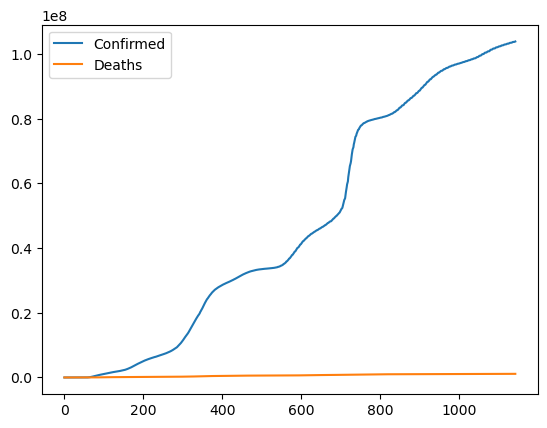

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import warnings
warnings.filterwarnings("ignore")
# URL da API COVID-19 dos EUA
url = "https://api.covid19api.com/total/dayone/country/usa"

# Faz uma solicitação GET para a API e carrega os dados em um DataFrame do pandas
response = requests.get(url)
data = response.json()
us_df = pd.DataFrame(data)

## criar um DataFrame com os dados obtidos
df = pd.DataFrame(data)

# selecionar apenas as colunas "Confirmed" e "Deaths"
df_conf_death = df[["Confirmed", "Deaths"]]

# plotar o gráfico
df_conf_death.plot()
plt.show()

In [13]:
import pandas as pd
import requests

url = "https://api.covid19api.com/total/dayone/country/brazil"
response = requests.get(url)
data = response.json()

brazil_df = pd.DataFrame(data)
#brazil_df = brazil_df[["Country", "Confirmed", "Deaths", "Recovered", "Active", "Date"]]

In [14]:
display(brazil_df)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Brazil,,,,,0,0,1,0,0,1,2020-02-26T00:00:00Z
1,Brazil,,,,,0,0,1,0,0,1,2020-02-27T00:00:00Z
2,Brazil,,,,,0,0,1,0,0,1,2020-02-28T00:00:00Z
3,Brazil,,,,,0,0,2,0,0,2,2020-02-29T00:00:00Z
4,Brazil,,,,,0,0,2,0,0,2,2020-03-01T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Brazil,,,,,0,0,37081209,699276,0,36381933,2023-03-05T00:00:00Z
1104,Brazil,,,,,0,0,37076053,699276,0,36376777,2023-03-06T00:00:00Z
1105,Brazil,,,,,0,0,37076053,699276,0,36376777,2023-03-07T00:00:00Z
1106,Brazil,,,,,0,0,37076053,699276,0,36376777,2023-03-08T00:00:00Z


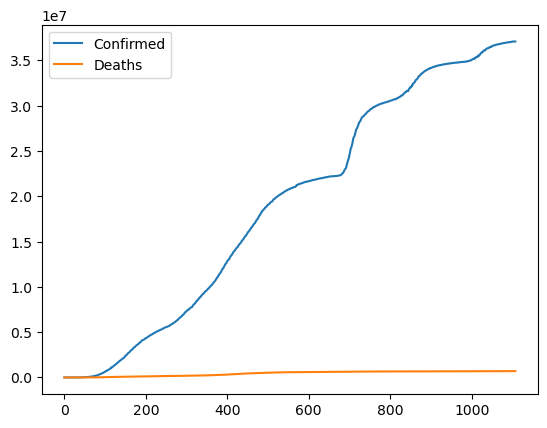

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import warnings
url = "https://api.covid19api.com/total/dayone/country/brazil"
response = requests.get(url)
data = response.json()

# criar um DataFrame com os dados obtidos
df = pd.DataFrame(data)

# selecionar apenas as colunas "Confirmed" e "Deaths"
df_conf_death = df[["Confirmed", "Deaths"]]

# plotar o gráfico
df_conf_death.plot()
plt.show()

In [ ]:
import pandas as pd
import pymysql
#import psycopg2

# Leitura do arquivo CSV usando a biblioteca pandas
#df = pd.read_csv('brazil_df.csv')
brazil_df = pd.DataFrame(data)

# Conexão ao banco de dados MySQL
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='ka240817',
    database='brasil'
)




# Conexão ao banco de dados Postgres
#conn = psycopg2.connect(
   # host="localhost",
   # database="mydatabase",
  #  user="myusername",
   # password="mypassword"
#)


# Criação da tabela no MySQL com as colunas correspondentes ao CSV

# Iteração pelas linhas do dataframe e inserção no MySQL
with conn.cursor() as cursor:
    for _, row in df.iterrows():
        # Convert ISO format to MySQL format
        date_str = row['Date']
        date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')
        date_mysql = date_obj.strftime('%Y-%m-%d %H:%M:%S')

        cursor.execute('''
            INSERT INTO covid_data (
                Country,
                CountryCode,
                Province,
                City,
                CityCode,
                Lat,
                Lon,
                Confirmed,
                Deaths,
                Recovered,
                Active,
                Date
            ) VALUES (
                %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
            )
        ''', (
            row['Country'],
            row['CountryCode'],
            row['Province'],
            row['City'],
            row['CityCode'],
            row['Lat'],
            row['Lon'],
            row['Confirmed'],
            row['Deaths'],
            row['Recovered'],
            row['Active'],
            date_mysql  # Use the MySQL-formatted date string here
        ))

# Commit e fechamento da conexão
conn.commit()
conn.close()
